In [ ]:
# Methods/ Analysis
install.packages("caret")
library(dplyr) # for data manipulation
library(stringr) # for data manipulation
library(caret) # for sampling
install.packages("caTools")
library(caTools) # for train/test split
library(ggplot2) # for data visualization
install.packages("corrplot")
library(corrplot) # for correlations
install.packages("DMwR")
library(DMwR) # for smote implementation
install.packages("ROSE")
library(ROSE)# for ROSE sampling
install.packages("rpart")
library(rpart)# for decision tree model
install.packages("Rborist")
library(Rborist)# for random forest model
install.packages("xgboost")
library(xgboost) # for xgboost model


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’, ‘TTR’, ‘gplots’, ‘xts’, ‘quantmod’, ‘zoo’, ‘abind’, ‘ROCR’


Loading required package: grid

Registere

In [ ]:
#Load data
data =read.csv("creditcard.csv")

**Basic Exploration**

In [ ]:
head(data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [ ]:
#The dataframe has 284807 observations with 31 variables. The variable ‘Class’ indicates whether a transaction is fraudulent(1) or not (0).
str(df)


'data.frame':	11959 obs. of  31 variables:
 $ Time  : int  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V1

In [ ]:
#All the anonymised features seem to have been be normalised with mean 0. We will apply that transformation to the “Amount” column later on to facilitate training ML models.
summary(data)

      Time             V1                 V2                  V3          
 Min.   :    0   Min.   :-56.4075   Min.   :-72.71573   Min.   :-33.6810  
 1st Qu.:29408   1st Qu.: -1.0128   1st Qu.: -0.59498   1st Qu.:  0.1914  
 Median :38645   Median : -0.2467   Median :  0.07174   Median :  0.7677  
 Mean   :35586   Mean   : -0.2532   Mean   : -0.02696   Mean   :  0.6789  
 3rd Qu.:46739   3rd Qu.:  1.1535   3rd Qu.:  0.72627   3rd Qu.:  1.4002  
 Max.   :55107   Max.   :  1.9605   Max.   : 18.90245   Max.   :  4.2261  
                                                                          
       V4                V5                 V6                  V7           
 Min.   :-5.1726   Min.   :-42.1479   Min.   :-26.16051   Min.   :-31.76495  
 1st Qu.:-0.7251   1st Qu.: -0.8901   1st Qu.: -0.63916   1st Qu.: -0.60447  
 Median : 0.1872   Median : -0.3049   Median : -0.15236   Median : -0.07379  
 Mean   : 0.1680   Mean   : -0.2724   Mean   :  0.09835   Mean   : -0.11379  
 3rd Qu.: 

In [ ]:
#Checking for missing values
colSums(is.na(data))

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      1      1      1      1      1

There is no missing value

In [ ]:
#Check class imbalance
#Clearly the dataset is very imbalanced with 284315 of cases being non-fraudulent transactions
table(data$Class)


     0      1 
284315    492 

In [ ]:
prop.table(table(data$Class))


          0           1 
0.998272514 0.001727486 

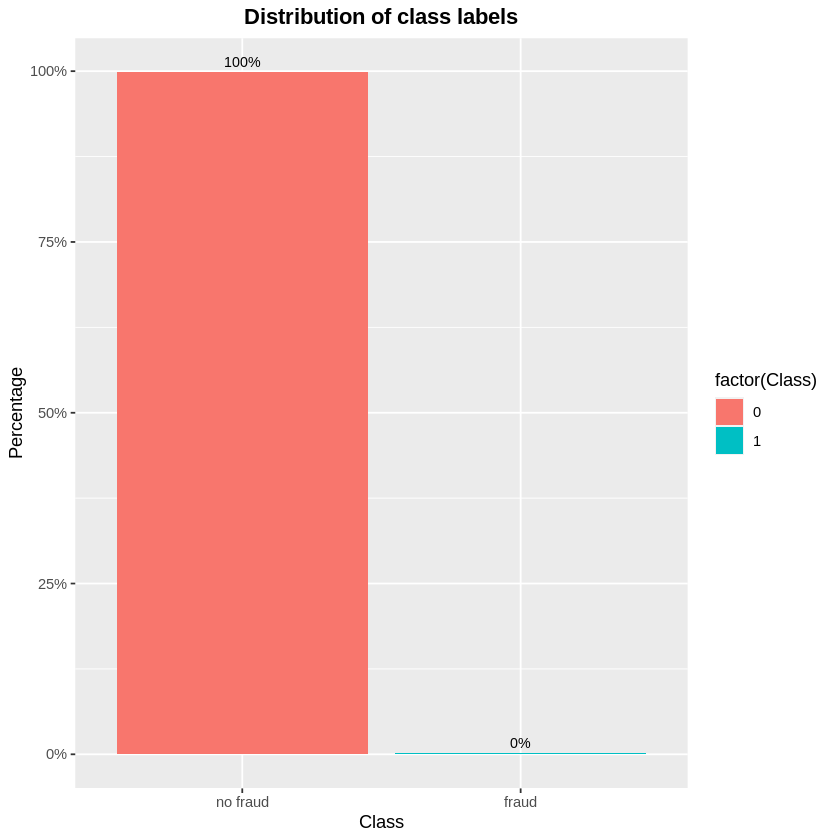

In [ ]:
common_theme <- theme(plot.title = element_text(hjust = 0.5, face = "bold"))

ggplot(data = data, aes(x = factor(Class), 
                          y = prop.table(stat(count)), fill = factor(Class),
                          label = scales::percent(prop.table(stat(count))))) +
    geom_bar(position = "dodge") + 
    geom_text(stat = 'count',
              position = position_dodge(.9), 
              vjust = -0.5, 
              size = 3) + 
    scale_x_discrete(labels = c("no fraud", "fraud"))+
    scale_y_continuous(labels = scales::percent)+
    labs(x = 'Class', y = 'Percentage') +
    ggtitle("Distribution of class labels") +
    common_theme

In [ ]:
#the dataset is very imbalanced with 99.8% of cases being non-fraudulent transactions

**Data Visualization**

Distribution of variable ‘Time’ by class

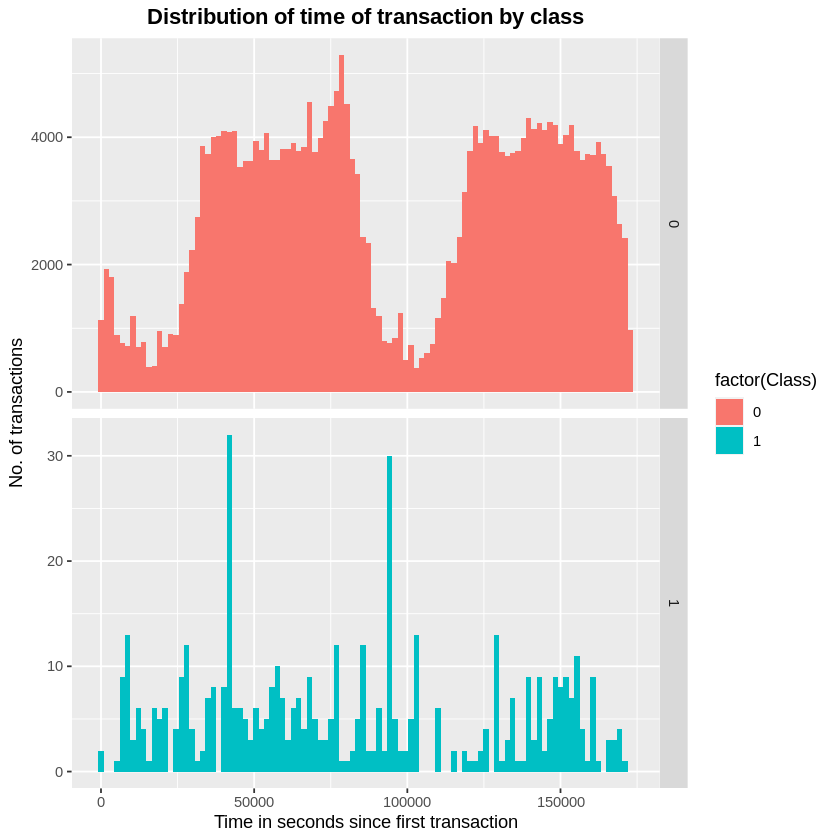

In [ ]:
data %>%
  ggplot(aes(x = Time, fill = factor(Class))) + geom_histogram(bins = 100)+
  labs(x = 'Time in seconds since first transaction', y = 'No. of transactions') +
  ggtitle('Distribution of time of transaction by class') +
  facet_grid(Class ~ ., scales = 'free_y') + common_theme


**Distribution of variable ‘Amount’ by class**

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


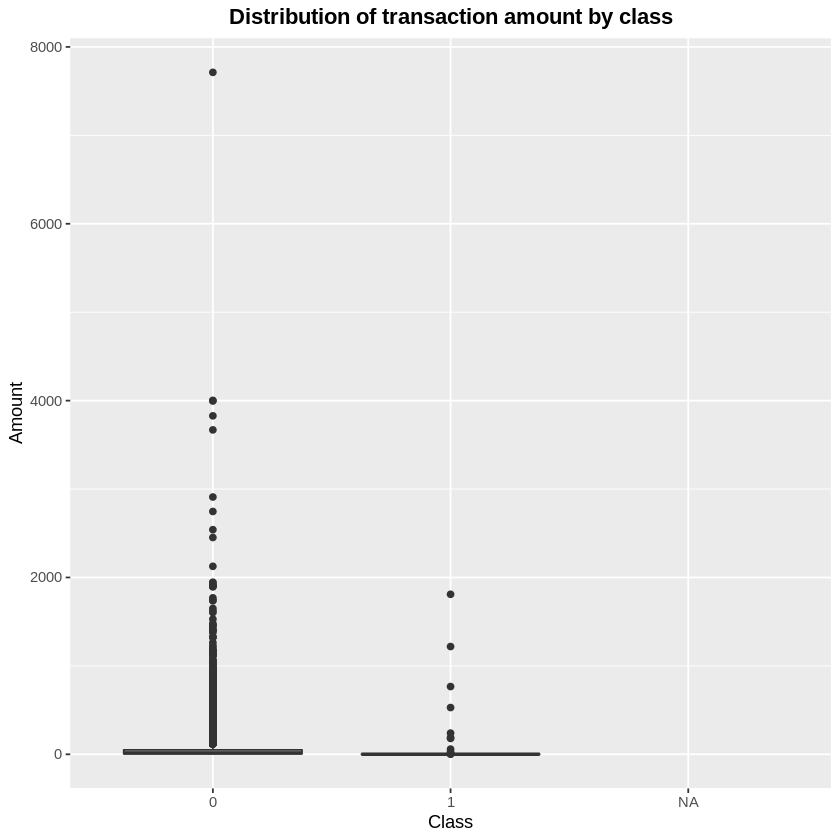

In [ ]:
#There is clearly a lot more variability in the transaction values for non-fraudulent transactions.
ggplot(df, aes(x = factor(Class), y = Amount)) + geom_boxplot() + 
labs(x = 'Class', y = 'Amount') +
ggtitle("Distribution of transaction amount by class") + common_theme


**Correlation of anonymised variables and ‘Amount’**

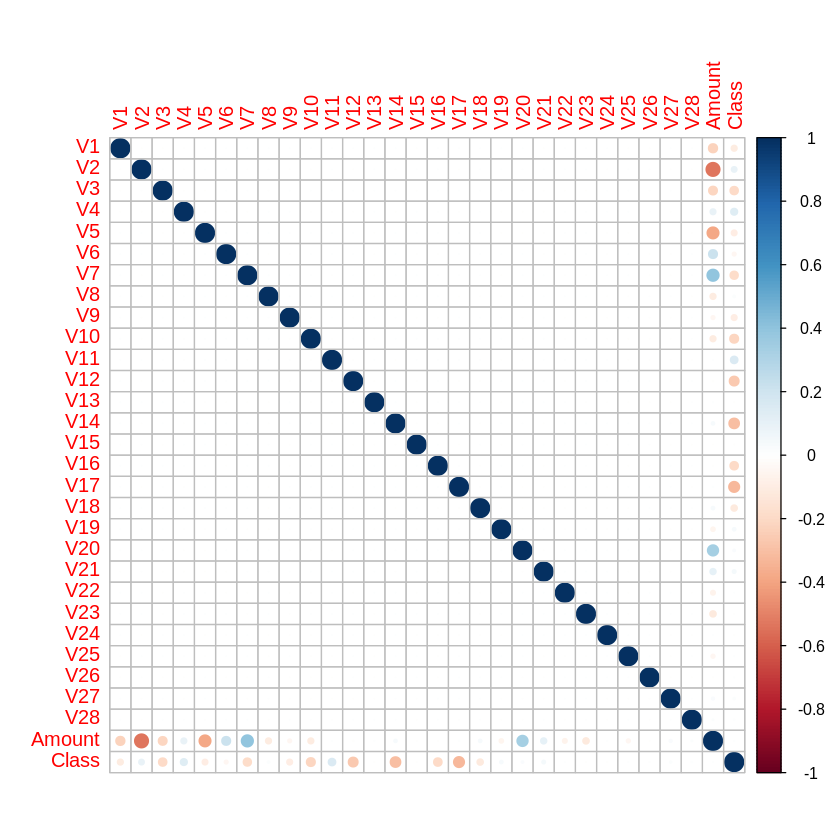

In [ ]:
#The corrplot package is a graphical display of a correlation matrix, confidence interval. 
corrplot(cor(data[,-1]),method = 'circle')

Most of the data features are not correlated. This is because before publishing, most of the features were presented to a Principal Component Analysis (PCA) algorithm. The features V1 to V28 are most probably the Principal Components resulted after propagating the real features through PCA.

In [ ]:
#Below are the methods used here to treat the imbalanced dataset:

#Undersampling
#Oversampling
#Synthetic Data Generation
#Our modeling approach will involve training a single classifier on the train set with class imbalance suitably altered using each of the techniques above. Depending on which technique yields the best roc-auc score on a holdout test set. we will build subsequent models using that chosen technique.

**Data Preparation**

‘Time’ feature does not indicate the actual time of the transaction and is more of listing the data in chronological order. Based on the data visualization above we assume that ‘Time’ feature has little or no significance in correctly classifying a fraud transaction and hence eliminate this column from further analysis.

In [ ]:
#Remove 'Time' variable
data <- data[,-1]

In [ ]:
#Change 'Class' variable to factor
data$Class <- as.factor(data$Class)
levels(data$Class) <- c("Not_Fraud", "Fraud")

#Scale numeric variables

data[,-30] <- scale(data[,-30])

head(data)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.6942411,-0.04407485,1.6727706,0.9733638,-0.245116153,0.34706734,0.1936786,0.08263713,0.3311272,0.08338540,⋯,-0.02492332,0.382853766,-0.17691102,0.1105067,0.2465850,-0.3921697,0.33089104,-0.06378104,0.24496383,Not_Fraud
2,0.6084953,0.16117564,0.1097969,0.3165224,0.043483276,-0.06181986,-0.0637001,0.07125336,-0.2324938,-0.15334936,⋯,-0.30737626,-0.880075209,0.16220090,-0.5611296,0.3206933,0.2610690,-0.02225564,0.04460744,-0.34247394,Not_Fraud
3,-0.6934992,-0.81157640,1.1694664,0.2682308,-0.364571146,1.35145121,0.6397745,0.20737237,-1.3786729,0.19069928,⋯,0.33763110,1.063356404,1.45631719,-1.1380901,-0.6285356,-0.2884462,-0.13713661,-0.18102051,1.16068389,Not_Fraud
4,-0.4933240,-0.11216923,1.1825144,-0.6097256,-0.007468867,0.93614819,0.1920703,0.31601704,-1.2625010,-0.05046786,⋯,-0.14744304,0.007266895,-0.30477601,-1.9410237,1.2419015,-0.4602165,0.15539593,0.18618826,0.14053401,Not_Fraud
5,-0.5913287,0.53154012,1.0214099,0.2846549,-0.295014918,0.07199846,0.4793014,-0.22650983,0.7443250,0.69162382,⋯,-0.01283920,1.100009340,-0.22012301,0.2332497,-0.3952009,1.0416095,0.54361884,0.65181477,-0.07340321,Not_Fraud
6,-0.2174742,0.58167387,0.7525841,-0.1188331,0.305008424,-0.02231344,0.3849353,0.21795429,-0.5176177,-0.34110050,⋯,-0.28352172,-0.771425648,-0.04227277,-0.6132723,-0.4465828,0.2196368,0.62889938,0.24563577,-0.33855582,Not_Fraud


In [ ]:
#Split data into train and test sets
set.seed(123)
split <- sample.split(data$Class, SplitRatio = 0.7)
train <-  subset(data, split == TRUE)
test <- subset(data, split == FALSE)

In [ ]:
#Choosing sampling technique
#Let us create different versions of the training set as per sampling technique

In [ ]:
table(train$Class)


Not_Fraud     Fraud 
   199020       344 

In [ ]:
set.seed(9560)
down_train <- downSample(x = train[, -ncol(train)],
                         y = train$Class)
table(down_train$Class)  


Not_Fraud     Fraud 
      344       344 

In [ ]:
set.seed(9560)
up_train <- upSample(x = train[, -ncol(train)],
                         y = train$Class)
table(up_train$Class)  


Not_Fraud     Fraud 
   199020    199020 

In [ ]:
set.seed(9560)
smote_train <- SMOTE(Class ~ ., data  = train)

table(smote_train$Class)  


Not_Fraud     Fraud 
     1376      1032 

In [ ]:
set.seed(9560)
rose_train <- ROSE(Class ~ ., data  = train)$data 

table(rose_train$Class) 


Not_Fraud     Fraud 
    99844     99520 

In [ ]:
 #We will now apply various sampling techniques to the data and see the performance on the test set.
 set.seed(5627)
# Build down-sampled model

down_fit <- rpart(Class ~ ., data = down_train)
set.seed(5627)
# Build up-sampled model
up_fit <- rpart(Class ~ ., data = up_train)
set.seed(5627)
# Build smote model
smote_fit <- rpart(Class ~ ., data = smote_train)
set.seed(5627)
# Build rose model
rose_fit <- rpart(Class ~ ., data = rose_train)

In [ ]:
pred_down <- predict(down_fit, newdata = test)
roc.curve(test$Class, pred_down[,2], plotit = FALSE)

Area under the curve (AUC): 0.942

In [ ]:
pred_up <- predict(up_fit, newdata = test)
roc.curve(test$Class, pred_up[,2], plotit = FALSE)

Area under the curve (AUC): 0.943

In [ ]:
pred_smote <- predict(smote_fit, newdata = test)
roc.curve(test$Class, pred_smote[,2], plotit = FALSE)

Area under the curve (AUC): 0.934

In [ ]:
pred_rose <- predict(rose_fit, newdata = test)
roc.curve(test$Class, pred_rose[,2], plotit = FALSE)

Area under the curve (AUC): 0.942

In [ ]:
#We will test different models now using the up sampling technique as that has given the highest auc score.

In [ ]:

#Specifically the following models will be tested:

#logistic regression (GLM)
#random forest (RF)
#xgboost (XGB) 1

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Area under the curve (AUC): 0.971

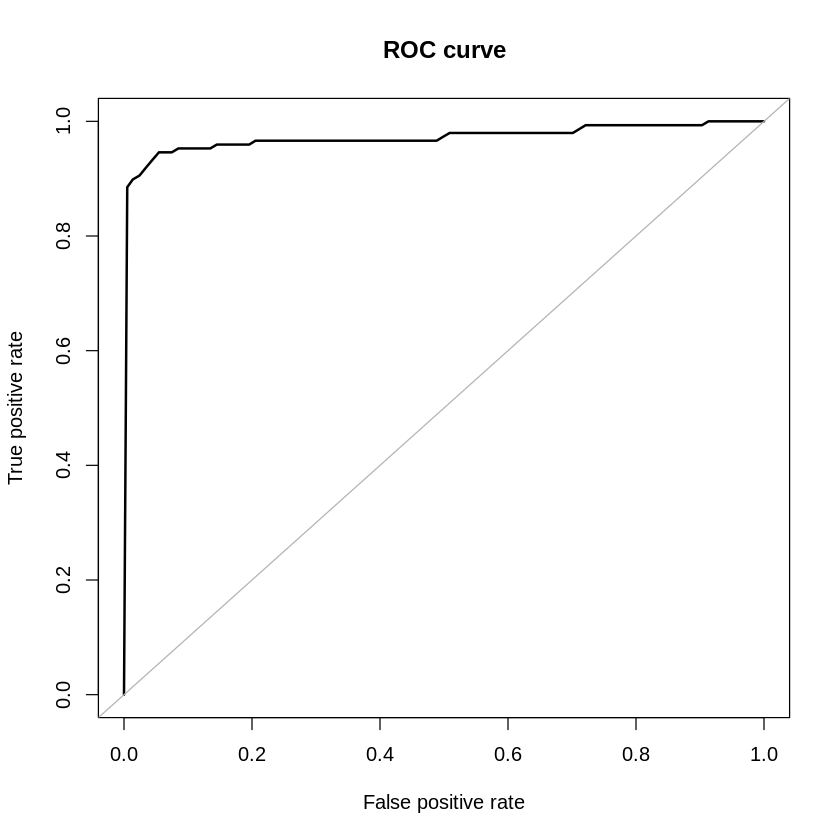

In [ ]:
#logistic regression (GLM)
glm_fit <- glm(Class ~ ., data = up_train, family = 'binomial')
pred_glm <- predict(glm_fit, newdata = test, type = 'response')
roc.curve(test$Class, pred_glm, plotit = TRUE)


Area under the curve (AUC): 0.973

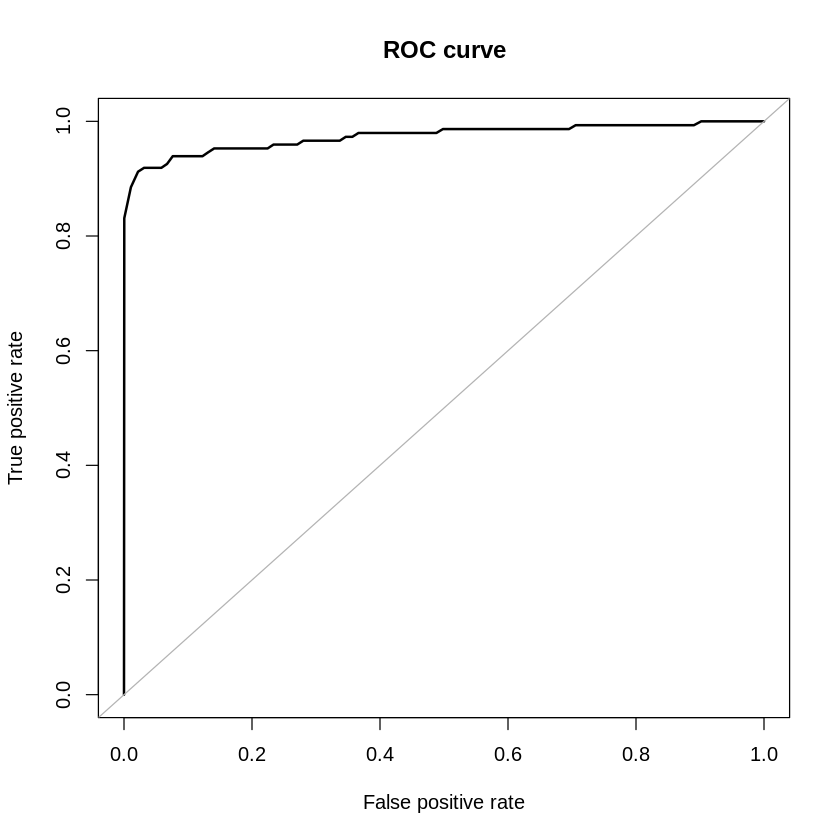

In [ ]:
#random forest (RF)
x = up_train[, -30]
y = up_train[,30]
rf_fit <- Rborist(x, y, ntree = 1000, minNode = 20, maxLeaf = 13)
rf_pred <- predict(rf_fit, test[,-30], ctgCensus = "prob")
prob <- rf_pred$prob
roc.curve(test$Class, prob[,2], plotit = TRUE)

In [ ]:
#COnvert class labels from factor to numeric

labels <- up_train$Class

y <- recode(labels, 'Not_Fraud' = 0, "Fraud" = 1)

In [ ]:
xgb <- xgboost(data = data.matrix(up_train[,-30]), 
 label = y,
 eta = 0.1,
 gamma = 0.1,
 max_depth = 10, 
 nrounds = 300, 
 objective = "binary:logistic",
 colsample_bytree = 0.6,
 verbose = 0,
 nthread = 7,
 set.seed = 42
)

[16:27:13] WARNING: amalgamation/../src/learner.cc:480: 
Parameters: { set_seed } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Area under the curve (AUC): 0.974

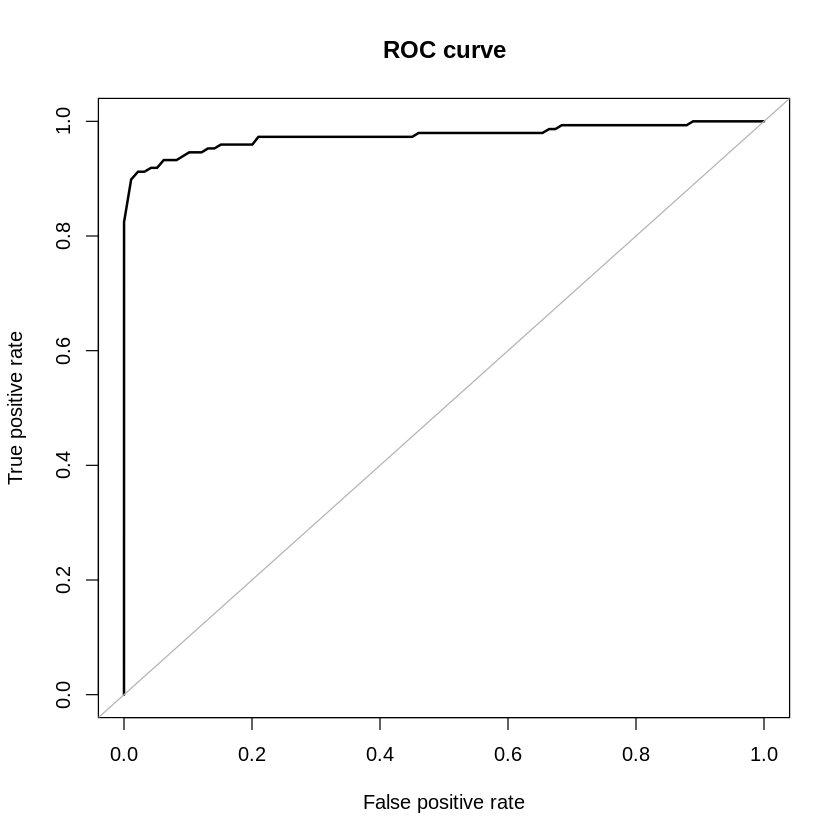

In [ ]:
xgb_pred <- predict(xgb, data.matrix(test[,-30]))

roc.curve(test$Class, xgb_pred, plotit = TRUE)

In [ ]:
#With an auc score of 0.974 the XGBOOST model has performed the best 
#though both the random forest and logistic regression models have shown reasonable performance.